In [1]:
"""
Analysis pipeline on BERT models
"""

import numpy as np
import matplotlib.pyplot as plt

from transformers import BertModel, AlbertModel, DistilBertModel, BartModel, OpenAIGPTModel, GPT2Model

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
def get_matricesBERT(model):

    layers = len(model.encoder.layer)    
    M = []
    for l in range(layers):
        Wq = model.encoder.layer[l].attention.self.query.weight.detach().numpy()
        Wk = model.encoder.layer[l].attention.self.key.weight.detach().numpy()
        M.append(Wq@(Wk.T))        

    return M

def get_matricesALBERT(model):

    layers = len(model.encoder.albert_layer_groups)    
    M = []
    for l in range(layers):
        Wq = model.encoder.albert_layer_groups[l].albert_layers[0].attention.query.weight.detach().numpy()
        Wk = model.encoder.albert_layer_groups[l].albert_layers[0].attention.key.weight.detach().numpy()
        M.append(Wq@(Wk.T))        

    return M

def get_matricesDistillBERT(model):

    layers = len(model.transformer.layer)
    M = []
    for l in range(layers):
        Wq = model.transformer.layer[l].attention.q_lin.weight.detach().numpy()
        Wk = model.transformer.layer[l].attention.k_lin.weight.detach().numpy()
        M.append(Wq@(Wk.T))        

    return M

def get_matricesBART(model):

    layers = len(model.encoder.layers)  
    M = []
    for l in range(layers):
        Wq = model.encoder.layers[l].self_attn.q_proj.weight.detach().numpy()
        Wk = model.encoder.layers[l].self_attn.k_proj.weight.detach().numpy()
        M.append(Wq@(Wk.T))        

    return M

def get_matricesGPT(d,model):

    layers = len(model.h)  
    M = []
    for l in range(layers):
        Wq = model.h[l].attn.c_attn.weight[:,:d].detach().numpy()
        Wk = model.h[l].attn.c_attn.weight[:,d:2*d].detach().numpy()
        M.append(Wq@(Wk.T))        

    return M

def decomposition_SN(A):
    
    S = np.linalg.norm(.5 * ((A - A.T) - np.diag(np.diag((A - A.T)))), 'fro') / np.linalg.norm(A, 'fro')
    N = np.linalg.norm(.5 * (A + A.T), 'fro') / np.linalg.norm(A, 'fro')

    return S, N

def decomposition_blocks(l,A):
    S = np.zeros(l)
    N = np.zeros(l)

    for i, layer in enumerate(range(l)):
        S[i], N[i] = decomposition_SN(A[layer])
    return  S, N

In [32]:
'BERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 12
d = 768
h = 12
dh = d // h

model = BertModel.from_pretrained("bert-base-uncased")
M = get_matricesBERT(model)
SBert_base, NBert_base = decomposition_blocks(l,M)

In [33]:
'BERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 12
d = 768
h = 12

dh = d // h

model = BertModel.from_pretrained("bert-base-chinese")
M = get_matricesBERT(model)
SBert_baseChinese, NBert_baseChinese = decomposition_blocks(l,M)

In [34]:
'BERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 24
d = 1024
h = 16
dh = d // h

model = BertModel.from_pretrained("bert-large-uncased")
M = get_matricesBERT(model)
SBert_large, NBert_large = decomposition_blocks(l,M)

In [35]:
'BERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 24
d = 1024
h = 16

dh = d // h

model = BertModel.from_pretrained("bert-large-uncased-whole-word-masking")
M = get_matricesBERT(model)
SBert_largeMasking, NBert_largeMasking = decomposition_blocks(l,M)

In [36]:
'GPT1'

l = 12
d = 768
h = 12

dh = d // h

model = OpenAIGPTModel.from_pretrained("openai-gpt")
M = get_matricesGPT(d,model)
SGPT, NGPT = decomposition_blocks(l,M)

In [37]:
'GPT2'

l = 12
d = 768
h = 12

dh = d // h

model = GPT2Model.from_pretrained('gpt2')
M = get_matricesGPT(d,model)
SGPT2, NGPT2 = decomposition_blocks(l,M)

In [38]:
'ALBERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 1
d = 768
h = 12

dh = d // h

model = AlbertModel.from_pretrained("albert-base-v2")
M = get_matricesALBERT(model)
SALBERT_base, NALBERT_base = decomposition_blocks(l,M)

In [39]:
'ALBERT large model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 1
d = 1024
h = 16

dh = d // h

model = AlbertModel.from_pretrained("albert-large-v2")
M = get_matricesALBERT(model)
SALBERT_large, NALBERT_large = decomposition_blocks(l,M)

In [40]:
'ALBERT xlarge model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 1
d = 1024
h = 16

dh = d // h

model = AlbertModel.from_pretrained("albert-xlarge-v2")
M = get_matricesALBERT(model)
SALBERT_xlarge, NALBERT_xlarge = decomposition_blocks(l,M)

In [41]:
'ALBERT xxlarge model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 1
d = 1024
h = 16

dh = d // h

model = AlbertModel.from_pretrained("albert-xxlarge-v2")
M = get_matricesALBERT(model)
SALBERT_xxlarge, NALBERT_xxlarge = decomposition_blocks(l,M)

In [42]:
'DistillBERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 6
d = 768
h = 12

dh = d // h

model = DistilBertModel.from_pretrained("distilbert-base-uncased")
M = get_matricesDistillBERT(model)
SDistillBERT, NDistillBERT = decomposition_blocks(l,M)

In [43]:
'import BERT base model (l = 12, d = 768, h = 12 ; tot num parameters 110M)'

l = 12
d = 1024
h = 16

dh = d // h

model = BartModel.from_pretrained("facebook/bart-large")
M = get_matricesBART(model)
SBART, NBART = decomposition_blocks(l,M)

(0.0, 1.1)

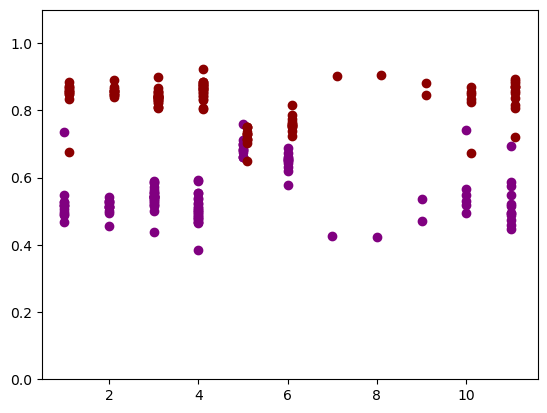

In [44]:
plt.scatter(np.ones(SBert_base.size),SBert_base.flatten(),color='purple')
plt.scatter(1.1*np.ones(SBert_base.size),NBert_base.flatten(),color='darkred')

plt.scatter(2*np.ones(SBert_baseChinese.size),SBert_baseChinese.flatten(),color='purple')
plt.scatter(2.1*np.ones(SBert_baseChinese.size),NBert_baseChinese.flatten(),color='darkred')

plt.scatter(3*np.ones(SBert_large.size),SBert_large.flatten(),color='purple')
plt.scatter(3.1*np.ones(SBert_large.size),NBert_large.flatten(),color='darkred')

plt.scatter(4*np.ones(SBert_largeMasking.size),SBert_largeMasking.flatten(),color='purple')
plt.scatter(4.1*np.ones(SBert_largeMasking.size),NBert_largeMasking.flatten(),color='darkred')

plt.scatter(5*np.ones(SGPT.size),SGPT.flatten(),color='purple')
plt.scatter(5.1*np.ones(SGPT.size),NGPT.flatten(),color='darkred')

plt.scatter(6*np.ones(SGPT2.size),SGPT2.flatten(),color='purple')
plt.scatter(6.1*np.ones(SGPT2.size),NGPT2.flatten(),color='darkred')

plt.scatter(7*np.ones(SALBERT_base.size),SALBERT_base.flatten(),color='purple')
plt.scatter(7.1*np.ones(SALBERT_base.size),NALBERT_base.flatten(),color='darkred')

plt.scatter(8*np.ones(SALBERT_large.size),SALBERT_large.flatten(),color='purple')
plt.scatter(8.1*np.ones(SALBERT_large.size),NALBERT_large.flatten(),color='darkred')

plt.scatter(9*np.ones(SALBERT_xlarge.size),SALBERT_xlarge.flatten(),color='purple')
plt.scatter(9.1*np.ones(SALBERT_xlarge.size),NALBERT_xlarge.flatten(),color='darkred')

plt.scatter(9*np.ones(SALBERT_xxlarge.size),SALBERT_xxlarge.flatten(),color='purple')
plt.scatter(9.1*np.ones(SALBERT_xxlarge.size),NALBERT_xxlarge.flatten(),color='darkred')

plt.scatter(10*np.ones(SDistillBERT.size),SDistillBERT.flatten(),color='purple')
plt.scatter(10.1*np.ones(SDistillBERT.size),NDistillBERT.flatten(),color='darkred')

plt.scatter(11*np.ones(SBART.size),SBART.flatten(),color='purple')
plt.scatter(11.1*np.ones(SBART.size),NBART.flatten(),color='darkred')

plt.ylim(0,1.1)

In [ ]:
np.diag()